<a href="https://colab.research.google.com/github/Bertha-ding/20MA573-yuning-ding/blob/master/hw/hw3-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Recall that, 


__Written K-strike straddle__ is a portfolio of
- selling K-strike call of one unit
- selling K-strike put of one unit

__Butterfly__ with three stikes $K_1 < K_2 < K_3$ is the portfolio of
- 1 unit of written K-strike straddle
- 1 unit of purchased K-strike call
- 1 unit of purchased K-strike put

Plot a diagram of exercise price versus payoff for the following portfolios:
- written 40-strike straddle
- a butterfly consists of
  - written 40-strike straddle
  - purchased 45-strike call
  - purchased 35-strike put

Now we use code to give the diagram of exercise price versus payoff for written 40-strike straddle.

In [0]:
class VanillaOption:
    def __init__(
        self,
        otype = 1, # 1: 'call'
                  # -1: 'put'
        strike = 110.,
        maturity = 1.,
        market_price = 10.):
      self.otype = otype
      self.strike = strike
      self.maturity = maturity
      self.market_price = market_price #this will be used for calibration
      
        
    def payoff(self, s): #s: excercise price
      otype = self.otype
      k = self.strike
      maturity = self.maturity
      return max([0, (s - k)*otype])

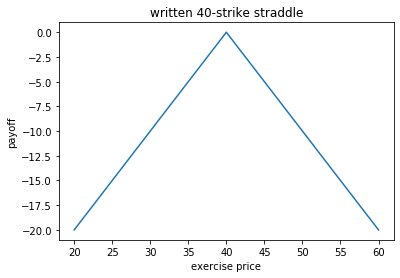

In [6]:
import matplotlib.pyplot as plt
import numpy as np
opt1 = VanillaOption(otype = 1, strike = 40, maturity= 1.)
opt2 = VanillaOption(otype = -1, strike = 40, maturity= 1.) 
stk_list = range(20, 61)
payoff_list1 = [opt1.payoff(s) for s in stk_list]
payoff_list2 = [opt2.payoff(s) for s in stk_list]
payoff_list3 = -np.array(payoff_list1) - np.array(payoff_list2)
plt.plot(stk_list, payoff_list3)

#decorations
plt.xlabel('exercise price')
plt.ylabel('payoff')
plt.title('written 40-strike straddle');
plt.show()

Then we use code to give the diagram of exercise price versus payoff for butterfly.

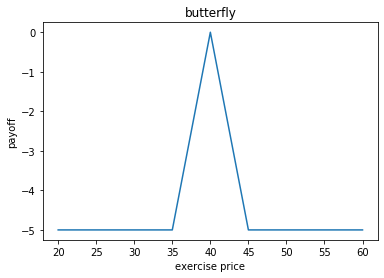

In [7]:
opt3 = VanillaOption(otype = 1, strike = 45, maturity= 1.) 
opt4 = VanillaOption(otype = -1, strike = 35, maturity= 1.) 
stk_list = range(20, 61)
payoff_list4 = [opt3.payoff(s) for s in stk_list]
payoff_list5 = [opt4.payoff(s) for s in stk_list]
payoff_list6 = np.array(payoff_list3) + np.array(payoff_list4) + np.array(payoff_list5)
plt.plot(stk_list, payoff_list6)
plt.xlabel('exercise price')
plt.ylabel('payoff')
plt.title('butterfly');
plt.show()